<font size=4 color='cornflowerblue'>

# Tarea 4

<font color = 'pink'>
Diego González Baños

### Implementar una red neuronal de convolución usando el conjunto de datos mnist.



In [1]:
#### import keras
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

np.random.seed(1)
%matplotlib inline

<font size = 5 color="cornflowerblue">

Parte I: **Análisis de datos**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 1

<font size=4>

Importa y carga la base de datos mnist de Keras:

<font size = 4>

*El conjunto de datos mnist lo pueden obtener directamente de Keras: [mnist Keras](https://keras.io/examples/vision/mnist_convnet/)*

In [2]:
# Escribe el codigo aquí
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 2

<font size=4>

¿De qué tipo son los conjuntos que obtuviste?

In [3]:
# Escribe el codigo aquí
print('The type of x_train is', type(x_train))
print('The type of y_train is', type(y_train))

print('\nThe type of x_test is', type(x_test))
print('The type of y_test is', type(y_test))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>

The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 3

<font size=4>

¿Qué dimensión tienen los conjuntos que obtuviste?

In [4]:
# Escribe el codigo aquí
print('The shape of x_train is', x_train.shape)
print('The shape of y_train is', y_train.shape)

print('\nThe shape of x_test is', x_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (60000, 28, 28)
The shape of y_train is (60000,)

The shape of x_test is (10000, 28, 28)
The shape of y_test is (10000,)


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 4

<font size=4>

¿Cómo se ve una muestra de entrenamiento?, Responde a esta pregunta mostrando un ejemplo, ¿qué representa cada valor en la muestra?

In [5]:
# Escribe el codigo aquí
sample = 0
print("The features of a training sample \n \n", x_train[sample][:1])

The features of a training sample 
 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Los valores dentro de los paréntesis indican que tenemos arreglos de 28x28 pixeles 

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 5

<font size=4>

¿Las muestras estan normalizadas?, (cómo puedes saber esto) si no estan normalizadas, normalizalas. 

*recuerda que en el caso de imágenes la normalizacion es dividir cada pixel por la intensidad máxima (255)*

In [6]:
# Escribe el codigo aquí

#Normalizamos dividiendo entre por la intensidad máxima
train_x = x_train/255
test_x = x_test/255

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 6

<font size=4>


En un ejercicio anterior se obtuvo la muestra en forma de arreglo, ahora muestra la imagen y su correspondiente etiqueta (usa un ejemplo del conjunto de entrenamiento).


The y value of the first training sample is 5


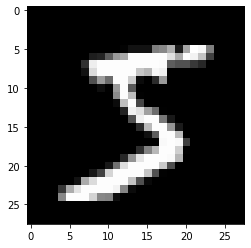

In [7]:
# Escribe el codigo aquí
plt.imshow(x_train[sample],cmap='gray');

print("\nThe y value of the first training sample is",np.squeeze(y_train[sample]))

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 7

<font size=4>

Dada una muestra de entrada (input) ¿de qué forma se indica la etiqueta (output)?

In [8]:
# Escribe el codigo aquí
y_train[:1]

array([5], dtype=uint8)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 8

<font size=4>

Convierte el output en representación one-hot.


Hint: Puedes usar la función de Keras [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function)

Observa cómo cambian sus dimensiones (muéstralo usando shape).

In [9]:
y_train.shape

(60000,)

In [10]:
y_train.reshape(-1).shape

(60000,)

In [11]:
train_y = np.eye(10)[y_train.reshape(-1)]
test_y = np.eye(10)[y_test.reshape(-1)]

In [12]:
print(y_train[0:5])

[5 0 4 1 9]


In [13]:
train_y[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 9

<font size=4>

Hasta aquí debes tener cuatro conjuntos de datos: los correspondientes a las entradas y las salidas de la red neuronal que se van a usar para el entrenamiento de la red (train_x y train_y) y los correspondientes a las entradas y salidas de la red neuronal que se van a usar para la prueba (test_x, test_y).

Muestra las dimensiones de estos cuatro conjuntos.

In [14]:
print('The shape of x_train is', train_x.shape)
print('The shape of y_train is', train_y.shape)

print('\nThe shape of x_test is', test_x.shape)
print('The shape of y_test is', test_y.shape)

The shape of x_train is (60000, 28, 28)
The shape of y_train is (60000, 10)

The shape of x_test is (10000, 28, 28)
The shape of y_test is (10000, 10)


<font size = 5 color="cornflowerblue">

Parte II: **Implemetación de la red neuronal**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 10

<font size=4>

Implementa una red neuronal de convolución dentro de una función (como lo hemos visto en clase). Puedes guiarte con el notebook de la clase 10 o de [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) *(no uses la misma arquitectura que se da)*.

Cuida que la función que implementes sea flexible, es decir, que si cambiamos las dimensiones de las entradas no se tenga que modificar la función directamente, más bien indicarlo como un argumento de la función. 

In [15]:
# Escribe el codigo aquí
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',bias_initializer='zeros', \
                     input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(64, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 11

<font size=4>

Crea el modelo definido en el ejercicio anterior (es decir llama a la función que creaste con los argumentos adecuados).

In [16]:
# Escribe el codigo aquí
one_image = (28, 28, 1)
activation='sigmoid'
num_classes=10
dropout=True
batch_normalization=True

mnist_model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 12

<font size=4>

Usa la función plot_model para obtener una representación esquemática del modelo implementado. 

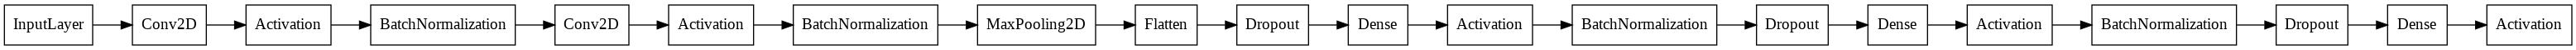

In [17]:
# Escribe el codigo aquí
plot_model(mnist_model,show_shapes=False, rankdir='LR',show_layer_names=False)

<font size=4 color='black'> 
 [plot_model](https://keras.io/visualization/#training-history-visualization)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 13

<font size=4>

¿Cuántos parámetros tiene el modelo de red neuronal que implementaste? 

Puedes responder a esta pregunta usando el atributo summary(). 

In [18]:
# Escribe el codigo aquí
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                        

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 14

<font size=4>

Compila el modelo seleccionando un optimizador (con una tasa de aprendizaje seleccionable, es decir, no uses los valores por defecto), la función de costo (loss) y una metrica adecuadas para este problema.

Hint: en la clase 10 revisamos un problema similar, puedes consultar la función de costo y la métrica utilizada. 

In [19]:
# Escribe el codigo aquí
learning_rate = 0.015

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

In [20]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

In [21]:
mnist_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 15


<font size=4>

Entrena la red neuronal que implementaste, indica la cantidad de datos a usar para validar el modelo, el número de epocas a utilizar así como el tamaño del batch. No olvides usar shuffle=True.

In [22]:
# Escribe el codigo aquí
start_time = time.time()

validation_portion = 0.1
batch_size=128
num_epochs = 100

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/mnist", histogram_freq=1)

history = mnist_model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True,
                            callbacks=[tensorboard_callback], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/100
422/422 [==============================] - 10s 17ms/step - loss: 0.5394 - accuracy: 0.8427 - val_loss: 0.1946 - val_accuracy: 0.9505
Epoch 2/100
422/422 [==============================] - 7s 17ms/step - loss: 0.2810 - accuracy: 0.9220 - val_loss: 0.0929 - val_accuracy: 0.9757
Epoch 3/100
422/422 [==============================] - 9s 21ms/step - loss: 0.2071 - accuracy: 0.9439 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 4/100
422/422 [==============================] - 8s 19ms/step - loss: 0.1723 - accuracy: 0.9514 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 5/100
422/422 [==============================] - 7s 16ms/step - loss: 0.1482 - accuracy: 0.9584 - val_loss: 0.0578 - val_accuracy: 0.9845
Epoch 6/100
422/422 [==============================] - 7s 15ms/step - loss: 0.1314 - accuracy: 0.9634 - val_loss: 0.0540 - val_accuracy: 0.9847
Epoch 7/100
422/422 [==============================] - 7s 16ms/step - loss: 0.1169 - accuracy: 0.9665 - val_loss: 0.0499 - val_accuracy

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 16

<font size=4>

Grafica el costo en función de la epoca para los conjuntos de entrenamiento y de validación.

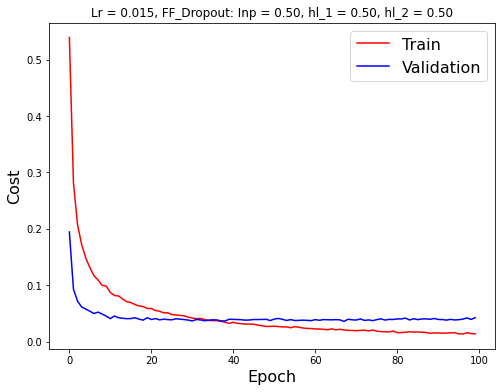

In [23]:
# Escribe el codigo aquí
plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl_1 = 0.50, hl_2 = 0.50')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch',size=16)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.show()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 17


<font size=4>

Grafica el accuracy (la precisión del modelo) en función de la epoca para los conjuntos de entrenamiento y de validación.

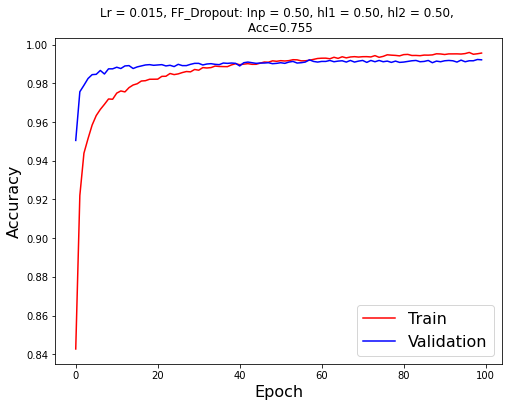

In [24]:
# Escribe el codigo aquí
plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl1 = 0.50, hl2 = 0.50, \n Acc=0.755')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', fontsize=16)
plt.show()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 18

<font size=4>

Evalua el modelo en el conjunto de prueba. Usa el métodod evaluate()

In [25]:
# Escribe el codigo aquí
evaluations = mnist_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9892
Loss = 0.040661219507455826
Test Accuracy = 0.9891999959945679


<font size = 5 color="cornflowerblue">

Parte III: **Inferencia**

<font size=4 color='rosybrown'>
    
    
#### Ejercicio 19

<font size=4>

Realiza predicciones sobre el conjunto de prueba. Usa el método predict()

Muestra algun ejemplo, es decir dado un input tomado del conjunto test_x muestra cuál es la inferencia realizada por la red neuronal y cual es la etiqueta real (la correspondiente test_y).

In [26]:
# Escribe el codigo aquí
predictions = mnist_model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [27]:
sample = 15

the sample 15 corresponds to: 7


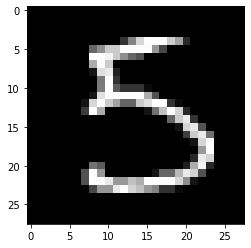

In [28]:
prediction = np.argmax(predictions[sample])
plt.imshow(test_x[sample].reshape((28, 28)),cmap='gray')
print('the sample', sample,'corresponds to:',np.squeeze(train_y[sample]))
